# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [1]:
import base64
filename = "cv_assignment.jpg"
with open(filename, "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFQAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAAABAAADoAQAAQAAAAABAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDMwAP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAQABAAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAACAwEEBQAGB//EABgBAQEBAQEAAAAAAAAAAAAAAAABAgME/9oADAMBAAIQAxAAAAHTFseXsoHhYhFldtRnRa1imIxgHIZgSEQTHAYg9IrIQJC2TFddsFqdZgqKuplz03Kur63gKOGRAS1QvjipPjCOGScUSdMcnRMEAQg9MEdMAxMixMYBTBmqda5XutRlRq2hCUkR4KOM44KD6eInpO7pQeKABMQRMI6Ogie4gSEWtqVRXai69c23OuNYrMlWLk2UB0uXIRvzL5yN7HzpXV5zux1eSxCIHQgRwoAs9U6rkVRLcU+i0lIrFYk6v0GZ7XnmYmyZiSZGBnKAs05qS48LjHZnKkZwScMLU1cuihQ07kQPhEDgUByxVX0s/CBnfv58hWk9sHjkV7JXkuPSUMaJvc2sH1GuPmA9gV5+Gn22aebI6c3YhPKYjBwlFowUCxYAoSXS1muzZjSr

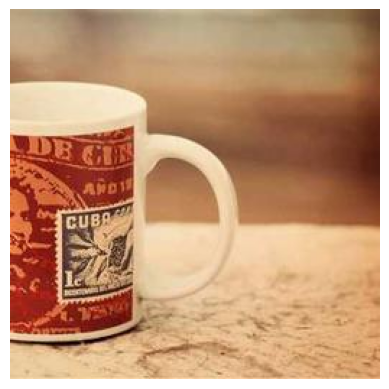

In [2]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

base64_image = "/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFQAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAAABAAADoAQAAQAAAAABAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDMwAP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAQABAAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAACAwEEBQAGB//EABgBAQEBAQEAAAAAAAAAAAAAAAABAgME/9oADAMBAAIQAxAAAAHTFseXsoHhYhFldtRnRa1imIxgHIZgSEQTHAYg9IrIQJC2TFddsFqdZgqKuplz03Kur63gKOGRAS1QvjipPjCOGScUSdMcnRMEAQg9MEdMAxMixMYBTBmqda5XutRlRq2hCUkR4KOM44KD6eInpO7pQeKABMQRMI6Ogie4gSEWtqVRXai69c23OuNYrMlWLk2UB0uXIRvzL5yN7HzpXV5zux1eSxCIHQgRwoAs9U6rkVRLcU+i0lIrFYk6v0GZ7XnmYmyZiSZGBnKAs05qS48LjHZnKkZwScMLU1cuihQ07kQPhEDgUByxVX0s/CBnfv58hWk9sHjkV7JXkuPSUMaJvc2sH1GuPmA9gV5+Gn22aebI6c3YhPKYjBwlFowUCxYAoSXS1muzZjSref3LrzU1nYzktrQz38jqraqbHqPJeq15jr0cVz9bZ8RdPW4GnaufAx6DFdEw6BcHyiJioLaAlbV0hbA1N91Nfn9tsnokyh2szpFTeNMteog0fQYmw82KNjoRzoJ9N5fUudPy3rMJMzm9Np5vCQsitZdpdU03FVRXbVqenxtPI4ey9Yyps0k2R1yy17MaziXLcXN3Vq3M88vi7GwhggMiD0eXpUN8sbmRnqvjEGCFRS5Qpbhqsq2vTfzLCePqxmpf2z6SE0teHRZi70PYvO570rlHW1jPLTmzKHWiXJHYhUoswmTG301idt8Yq94I88n00L5hfqQXy6vWBL5ypX6+s0CvU9LSt1engt3KFvCfOaVfT0Ot5r0eY/h4nhgnokWSnrPRBPBMEPRLwFEoRMKAGOb5jMbG/bWiwvWfQVL1jfgpWE2cVeXsKG7WHuMtkDSBZIvprKyQnOjJZnKhUr5rmNgYCXC5SWKprzqlDv3MVE2ekoX86+I2LQWadXnXZ3fN684bRZZ3nfBbFkkjD4VMsySwoGZSitK2BUAM8coAaJryXXY37EXCpyWMx3axZrV33Kla9y862vk25x0JF2cuMSFGyVmFMhcsoLbXDDlPTKyCgVPHLyyBawbSOnLKHYpW5/WWJSVtXDy9rciWq6xVzTmlC3RoEaS1LS6eVZWyizCQMipjARJLFXCIQxZAunPRvjxCAwZ5RKYOCClHM1VAlWsrMyKLJogC3lpmwVmalgELPRVYUKExECt8L//EACoQAAICAgEDAwQCAwEAAAAAAAABAhEDEgQQFCEFEyAiMDEyI0EkM0AV/9oACAEBAAEFAur6MtikzdmzNmbM2NjY2NjY2Njc2L6P4sfyYxoooS619iiiiiiiijUkiSGvtr/jZIZf2V/ysZsbF/NfcsvrfwbGxliZfS/+ljGLgwOzxHa4jtsR2mI7PEdnA7MfFmPHOPSyyyyyy+tlll/JjH9uWKEzNhePpZZZZZZZZZsbG5ubm5uOQ2X9zkSXs9LLLLLLLLL6WX0ssbGWalFfG0bnuFsz/wCuyyyy/i+llllllljZZ7uNmyL6WbxQ+RhR3eEnz8cY5PUJVxc2XLyc0XLH7GYePIiyyyy/t2Ppy41Pi/7W/wCecFDLkhHGZHKElrM1iapCVvibdyusoxkZOBimZuNlwFllll/Jj6Po5TZjWs3P655vcnOUmZv9uH6MT2k8r/x4XfDd8g2HyIxI54yFK+nK4P2n1fTySx4pEsWSA8szZH0SMctBqRJyePajgavk2crLUaKMfIyYzDmWSJzePq6KNTUoor4MfRcmG0YrJGMckMs8ccylBwl/Yo22qEcCDjyMstYMoooxyeOUJKcZraEoayoooooo1GhoaGih4J4xZZ3u6y+BOGSGTE4PjpJaL3Eltslk4U9+Tn/WjUorpxJ+WcmNT+NdGMaGiunKjUsGRPHaHGMh7TMkaPqZq2R4WXXhwwRzZ/1+ON6zOSvHzfVlEcm+PLn92OPCp45cWVz4vH45fFxyllxJTc8cMz5UYdvcuNj0nn/T5R8wz/pXWiujXWiiumXjr205GJyU+ZXu8pZteTUY5Kyw0tkZ/wA84bw7Y7Y7Y7Y7Y7ZkVUJx3h28jt5HbSO1kdqztZD48z2JnsTPYmexMeGZtkkp5ZLjRk4OOae3qf6w40pxxx2OGv8AGt1Pn4onH/EfjfR/iH2vB4KRkwvRPFFN8Y+jf1LwscuTVZc0oynhed/x+JEMn+RH5y/Efx9p9PfyI9nYnjcGl9Xqf648ubHj7nKzR8gy0sONW+E/czR+b8y+7FRzqUXCQvzzobxm8nEWCEomR+1x54omikcRwiLrfRIk6USy+uxsiy+tmxtYtscvqzZMigR8S5n1nIjfKxZ4ubeL35SjM9xRONnjkmvi5UflldX4NWKBXWyyxMlnlMWTWc3vMzrG4PsERycU3zTl7XJt9vE4uZzyY8iZaLR7iN2xRPA+jYn48Hn4ykk7Y/ik5P3448PfSO85KMmfksqUnVLhL+aEIwSaYqI69JXVyHsJDNl0tkpsUrNi/C8r8H5JwfWOKUy44BSWXG1KJGSeFZKjLJbc2z0793OOymx72rSt1LILZ9HSW9CkmSk0rchKSXuVL8qj8vo5IknjexKWUeGTftCxbGruPFzzI+mZWdnxuOT51mBNryJ0bWIR5LY4KSUaWTG1JXUVRKzXzRRr5pI/vwP1HGd/wjvfTx8z05ne+nI/9PhRc/VIRO95eVac7IY/TsZ7MYloUVdFURakbQR7sUWmeCUCKlHpqmeUf11bo/JoapjwwZ7UGZOBhyEfT8cTtsWNRg7srY2d+TI4oWWQ55jTPMhgFiHEv6oSmKy6G0zWizwNRKHZsWNu/lfwbPKmtempVH9/06NIk0RnSTUhsa2NaLSNbL8kvpEtulOxNnnq1ZVCTKJR8NO0Ux7FeKEnWvRq1o4uLkzyeSnfko1sqVeT/8QAJBEAAgEDBAICAwAAAAAAAAAAAAERAxASAiAwMRMhMmFAQVH/2gAIAQMBAT8B2xzxeCCCCNkEWjkVpPZLJZkxap2QQQQQJboEuPwI8H2eD7PChUtJV7MmZk8tb2zEek6FyVPlfUjTui7q6TyodUmXsXfAx9iszJmTMnbJmTMmZMyJs0PsQ+WR9is7TxSh0nIqTFRX7Ki9kcSJGZQOojU5c8nv+nsj83//xAAiEQADAAAGAwADAAAAAAAAAAAAARECEiAhMFEQMUAyQWH/2gAIAQIBAT8B+W+KXmvLDKNTiWmjfHdqLEJl8IhCE15hLokF7EuSdG5hfZmMxuUuqlKYE6PCqLCRk0vWqQS2MRKIyoymXxCaKJdiF+I/6Yeb9D97i8zjTKXkp79iiMqNhrjpUXCZl0PE/s//xAA3EAABAwIDBQYFAwMFAAAAAAABAAIRITEDEBIiMkFRYQQTIDBxkSNAQlKBM1CCcpKhJGNworH/2gAIAQEABj8C/wCQN9y4qx91Y+6sfdcVvFUeqQVVp/YahTdv7A4fsDvld9vurhXyut9vuv1W+6O1MXUwStnSHcim63GE4BfpuVWO9vkw7mvwmN4EFNP0upCG28SVpdDx1Cpg+xR2XiLqodHNSMOerimEkWPg2gCtnYKkiW8x8hDyP5BFwaHHoUHljxHRM4NBXw6ooG8lPj8r1CdFDRM4QM6uHut4Zl+CPVvnuLgIjgh9JKnDcSOiIJ9Vu+y3nD1UAtcnaY2uq0QLX1LfAnkhANrnLQ2/HPmFIy7xtjfzjsmql7L+6mmjkrQeah2fDNs8ijF/DIQIRBRHLzdbKwu8cd36U2GzK1afyoJnhW66LU6OixNQpCxNIHRYnIhNHJpR8WjKfODuaAtFFcLUCJQI32mnVB7d0/4yoJ9FLtj+pQx+t8eMHzy/SQo0wpmpMBbJDl8R7wXDgtcY3ssT/TPI+oHgtY7JhNHupGIyZgtwxZfE1PMfUblWpEeQPTzyQTzVCUN+JrC7LynisTU7Y10Cx3lwh+mIKIbpdOmw/wDUZaAJlUQZ0lR4Lq6ugER4b52VlZWVlLIn7StRG0aKWmCmziECbrBrN6qQ6vBPY4bSYYR1UA5cVSXdQg47zhJ+Wdp2nHmgx4J+r0K3XBN7qZm7lgTBuhoAcEBi9k/lMIjFoz7kTQtg2VBVDDHBtflt8oHvAZQBuhSVgUjog0YdOaDQB3nqnd6dltNld3h0aXcaym6jRu0sTF+4/LFpaGuHJaTn2Zo2Z+5d1TWbQu8eNr6QmYQmXmITe8BdHLgUWYTdJN9SGG0zpufInzpsUK1KhsyP8oFdk0y+t+aLjwZs1unTAi1UMQuBIChv5RkzxlygcBwt454eeNUUQe0QeKlUXZu+cNOk1Bhfd+StnALj0agcPspEc6KX4rMKeS1EuxnTxTrBobRoV/BQKT4LeTbxQEwYrGu0oRhs9k0aY4eq2nAIy6t1Kf6InKqpnYZVyjOxVjlKtnTOgQltYTi6NQsECUNbqoHvK8lPSJyeei0cVACiisq0VCqnK65qVaVsuVSozgOUTXK6q1gPotOka7SEAzTFqKrhzW+1b7T6KIKphOW0WtWrFfP9S0dnZTnCnTtdUJvnfKhVTCqcpbUeqo78HK0rc/7ZXV/B8TAxB6tlVbEf7a+kfwVdH9qoGf2LZHsxbODiGei+F2Q+rlt4vd9GhS+Xu6lQGgDpnZSrK6vnIMKKq5yv7quV/BdWW6FVo9lugeiqxp/C/SHsgdP+FbKNBjnltArYYT6qghVxFtFUM5ENJ9lWIyrlRVWytpUcuatGUeO3gogXKy5KuULnlSmVfBZXUwFGW7K1SRnZWKsrZ0nOoVjCtlY5UW0B+Mt1bqlsqrVbLdVlVpVJGW6v/8QAJxABAAICAQQCAgIDAQAAAAAAAQARITFBEFFhcSCBkbGhwTDR4fD/2gAIAQEAAT8hqUzMtG5eUdEQJECApeDloqWl+sy3irLR+WvWiJBBMkIOgCBCKgSpUqJElPgqRPTWI+ajGMSBKgQSoHQ+L8mVGMOOgQi+ixj0IdBCXLl9LjGPxvoxYsYekk6K38A+DMzLZfS5cWXF6i5l9Fxj1Nw6EEWMXCEqH+FOqSpUqVKjGGHoDtIB3/cD6jCPR+48Ax/7CD2+yfrxL/wALixinWuXmXLjHH13L+dzV99yY0+SX8Qegyy/ClS8tFdTeo+J8OYMS5fxBhll6F9S+h6BRi/cl/EFKetk8kQRXBFoqTx8YpMMY9S10WluhUYegYNT8SC6b0zDh+ZfmV7PzHeD2IhTHonijUo+1ohwGtnJL6FHGjUOC1IIWfgmjUKHNnwbNxYsYyokeix6CytDB/kiSvCo4zN4TJ5W1tMthgljcB4BZB0CXLV7osal5e3QdopCkqDRR4ihBmHE8kKu/g1P1CKD+MX1WPUYowxRDOiNRQxwwb2FMWIWBms8ytCMbvFM7nn8RFJyJYm1l4Yj5LozOF0KC2rLjxUGNItQ3zGuT0weUwmckKv/ACHEzM/Jj0MYosfEQ3tZmfYBhn2dbM2DvkS5FJ71M1rPC4joi3V1mIWCb44gFnpASV5kNsfJBk8TSZKy2ODt1HAXxMsz7O0uFT9h2Y/HKoqJEidG8YGkjkcxCQdFiirW0xiX2wapUpx9kxprz05oe2XEdkFuMxeoXg+orPQzJty/Aj/vO5NJTB15iI8q+LvTfiQGWrCyytzGlFWVXGwRG94PbFcqE2nj+5gMLhqZtd8PUS7jVpSIXDLNdKOyOR0wxDAHkMHxiqUNO8nRQU38KlRhIIOoMJRiCYaZicR6Fj/3IwUk/PhlCkKy7NwKCuHu5Js35tlZ0N7RiM7bVLkgVpoh6npU8HsdS4vmV8LixehiQRg8IOO8QKAPeMlS49p6CHimEhhvSzzBEZ6BxCcD6poh6UU5bF+JSgAqKkuoIUBzzidjxFwAJPdhweqfBWoN9KpXUToJEjDDDjBiZiBZP3DNfUnKz5bNoJ+BkmMWJbdeJeywljidnxdw7u026LE245gHC/OiBVbRqfdIJ2yvdj2MvF+jeDCOJvr9s8sxw9yE8xrh6ZMYJWsZs9eR7TEVoX/Mts7hKcSyHHmIVEH7NTB/tbNylTgurpuBeypz9zh6ahYB2YcX2hxHzVMUZEr4sqURCV2RIX4hts33wPDWkHv8SNOMOxEos7Vp1AVN0GZQEvAuPuGAZXxzzNd8sW6Ig4OFrd8YYCVze3+C6jE9bl9WKzMqCUynQlQA5EQ3c2Ajh/cWrk13nZNvTBL4WThcMpiiuDLNTU0zzntGkF7L0F/W5e23Uzj/AG4lg3kD0Ry5fS5fTXh0uMuXF6PRYsucvJzxHQUjLRvnzGbj5qXP2BbWDcXrEHbBnKidm9t92GEWM7rmCveFzsT/AFGyArTqj1CMfOBpfD0jL6V7ROYMsC23py6MctwbmJ6LzFjDQitZiF+qpgGy7gKC1Suoog4KXv8AUDkWWKZ0zBvzpFL3q4X28C25lp5AzmJ0rTdDv3+pRRBKSYpe1GHiMh0oh4hG4rZHwl34h5w30cKEqzFLNEuVuMtrlMRYtpiUJcLhl9SvEpEYqQZFBdHaUG07Mk+hi/EbTZY+Kv7mQC23Wp4bS9Gu0Kq4YAzDcCyEqOYjyR/t0yW2xYF6i1KTEG7TNiWw4hfMb9ETuxTvKEFz6EwMEsOKmLj0A7ntHShdfqF5M5wHLxEuarJNu8TeJKIt0S2mYBoqEGMvoytzkkneS7hG415dCGwhH3kzSUtQiFXUoNQlfwShBp3jpX6hyNI4ZuX9IhtRl3VT8UQ9JyNw1XZ4CoLiWWNymRou8yxF+SW1MsAFXLNNqLjsSqBruywD7cQ6xe0xEseSnYR2qAbjyKTB2+I9SWIonZj2ZtGx5CuYVLWjB5gCWE3LRtaNYgbig0vnSUpynsfUqKPJ3Rdk1ksWF+UzLVDKuLUETGCcRe6VNXv5YCyp3UfiEc44rQJX1+4V/MxFW3Zh+TMFVTKhFG6o+og0fco/rSgokGu7JQS3iC7InY1HsLMH/CC4oKn9XK6tK8uqqVMEq7WxOATW9MQ3F60vSBGNl7GfxGrSarafhrEZT7YOGBWIC444DpInxB/8GDTzu6YvhJALuoy36lnD6UxWK3wxRs4c5i7IGNOg33hxsd6xC2m4ilt+5zgGsysXR7ncMosWhtpT6mMVL5Iq4RzRBri5blxxEvubD8cR1Evc3uCfRTYuUaq8YTGCjiMClkTsUe4Xyn4JXIfzNdvRcygrvhF49+JEZ8VKbsJSXe8zS0SxcBw4MwfaqJZsr9zZT8EB3AtVV8RFlHXEt7Cs/wB9Dm1PG4uQekrkV7QDMHrUGJDs9EuV9+5uD9un6mnWPErMLeCN2FjZGzNGULVvpKvL6hRWzzFCkpgUDIlBWPUUMLeI3DqHT9J4WZPHrUTNx2iLbj2ljF/DMWxNwAf4mdIRGVvRgqiIembOa7VG47C+p9kL5RK8ROEeIGD8/UydI+ofM7YiyHcYnDL8TtWTNsP1Ktaalw3HsmInaQvi4lOVfkm5R9TeHxUwrFcxti32RKar6jcVewhnX8iUvY9RYv8AEhsZfUtFWH1P/9oADAMBAAIAAwAAABBJNmYSvELOI1cqGvUhga1Tuq+92MegspjQx1i8Aguftc+K7XE0YWDo1rrKI5HGtlXYnkVduHnkxWGE0G/kwA+ugIGoT4I0OClTuLyFHl6/Rs7vtLDAPRUKHN8iIGl4/r9ysi46QaMeXOfJbvUR0b1r/GzTpZodU3Wn/pdhcC3lDRkhCx0RnGT1k4Ot6ebnFW1IaPOjMnALIaPRSighDyP/AGfDyjChTpHtngv3ujGSZ2BsFsrRjLU5q/BPnLIdzRnv/8QAHhEAAwADAQEBAQEAAAAAAAAAAAERECExIFFBYXH/2gAIAQMBAT8QIhIhB5IgsJlFiEIQYhMlFFEZGJMWCYzMIQhMTCCVKZfo/pmkaERERejoRrMIyjYr4uKUpSm7THuI/RDrEFpELVTEvoXwUTL51T/SocZYOKpYN8DVX08Nay19F0OY0UbeUREGHws2cBu0PfENkN5aq9EIPY2mON3BtJD/ALiWITm80sUmFjqcxRdGzHvpPCykISEoqNlw7mg0jgTgvgWxLE8JDSi/g2fg6zQ11inVFcCQ54WJhcKkTGhsOfRJ3DIyPK8IR/hSab9H9MUQtkIaGiQgllZWU5mzwsVCP//EAB8RAAMBAAIDAQEBAAAAAAAAAAABERAhMSBBUWEwcf/aAAgBAgEBPxAonjy7R+KaKUTKN4q0pUVDZSieUpRlngbKUpcREQiIGg3VfhzkE4ylLjgITIIhCEEmKzSVPgv6dMNNEs5FiFwglhM1KVDJBcKZ0UpSlxCJZTr9KuBw2oJn6L7FYTG+CsrEyvQigoWG5gz0KBSXLHIVb0KUuIsFV8Mf4IK2xElUyugi6GEEDXreEKUNXcRJdiC4ESXA1GVl8GMePsXD/BRqoT4J9DgzPfOutdOcbxL0JRQWz7SG4+yjdG/C49V9glORewXqiHLKUvi9j4L4n+hAMdcDbyZduXwZf4tZM//EACYQAQACAgIBBQACAwEAAAAAAAEAESExQVFhEHGBkaGxwdHh8PH/2gAIAQEAAT8QVWGIcxy3EeY6ZYK7i27qG5Z2Y/Cy9udqHrMt5uWfSqRvwx5Iolup7sWNgTJqN6lPUTERmkW/SoiEeIh8zxSw1LdJV6HJBr1QnL6HDUrBuD1GCeog4lK1FuJ1ojqPMTqwQhg1GBxOJUIbGHEutXMkzwxjTDDX1tvR1E9VR16VcRII5QJNJdAwlemPcq8xSoZzHd5hVuJ3ADBcFQVPdKQFyksiCKy4sxHoozEUI3YUxVLuIEzGFUIMfF4iPcyNPqFLjTMkDEsyn0CIXZIKKy0aZzEuKuKRjyfRb+htFHmVDNhL7lUMwyniC21U8sq8zaCAxBUNehr0PMqV4iZgXEpiECI9NZSYOocagxqYcxcwpcM+oAm/W8z/AJBQY/uRXi+UVMQ/yeRlWYGnbrBi2MdiyY3fEC8wNbgblYDuV7jlG7LLzAMXKncRe4F5lImHnGGVuCwrYrYLDOoCDevQySoZgtVc0SGOk6klfcGjRHzMZch6/wAsWO4ucxO5XL9QZxFesH0kqNwcznljBqJqCQZcu4g9CWGWIdk4/caXccfReWlyZfQsJQxuel6ynMese3o4Zlt9GjTSnn7Qf/sqdfsB5o+Y0ckOwiW40RcRiSGWZGunFvMTUrAzyRoxD5JjzFQuJYqivMQ5nklzNxXMXuOcxaidxilpsqT4uWvxiymSEJ5HyxG7D4T3qML+5lIvFGNqTFh2nvCBQClC3rEyRcsM071fvKam+NHDEslLQS/kRxvecoQTpKmsPIh5ZlnMcYswTNgvUzlJNcRuoxLLsjnBDEcBf+OJWHLntSP5+xoKMurMj+R1ltTBuRgOQSke6Mr/AMVK0TszLIIM2Ff1Ex6XB3BZC0LKArHccuHyKrslQ0ZVW39xF1axgBBICpxkNjpPN39WWmR4y/LqfYgme+Vj0iNyyXUwJADFiIZ4zBFTAzsZj5wY3iZqeUMEyV3HP/JYX5ic5n3aJf5xHSgpWB0Z/wCIMw23hbtyQDO2A3XP0F1El6tDlfFn9RLsZY6azL3QKg9GfvcLSyldKxqVFjicS1nH2qCKg34WaKG0AQpHIkRVKtPT5/wiApMyxPmCzmcy4rY4lGazlGGJcx3dSatrjpizdMGGU5O4ai65WnitMXcXlA2a4w8Q58FU+m5h6Ps8+7E/iDKvFtKbFweY8GqQ1Lupbig0NHiOd6LhUUF6IKMeduOnEMh1FuO9meh5YrggxEsTSRkI8uT2YKs8JhXUxRlUo+Ix2fM8ERHLQS0wna9Jhj1qN1BXEHoEBscygoxKkaWMg0rw+0XXfJQHCitn7EHM1ZXadPmHnguNKeI5MssYX+Q14lEF8vEG4w4yXWfrxHajQWwsJemVg26TB/SujzAtYmVeWez0/COXdY4OiMBY2MKsQ1CWyke2UjT04O4l4ngi9Txx54/QNYjuYO+mKAQoWFvjxKpgDAwX+kDAAMVbij6ncAqd0NgHz5lWAytdvs77lqUPmXecfMRz2FKAzftkjKWXNUefiAFQw1uig+ZspByNFzBe38zOMKN6jT0Ngqx3zyTD5lC6afc9aIzVJRr0MUtuKk88YgACg0BVSoXip2f6igprsUXZfvE4e7WE0uBEo/wTVxatKFzj/EvJa+Y/wOoG26AwcbLtg4bgaDvHEC+F4A1tzg495g/S+PF514lDe0lMqDEQ6zHHzEC2N+3MzvxLx4P6TaMdy30DWoXUWYYVsw+mogFbdDZ4lSFW8nUPE1SaQW37zYcICiXj9hLUVrqqtm7eGNPUsGBSC5blQOpg3hri37iJnwrsBo61AwkuZQGus+JmCRcAkM8v5gJRarIFq+7mfNKnxMOiWESVE5HiWtyH8JcY/wCuKviMsv6jGGIFxc36p4IcNMAOKojRzDIl74XxD47sG/wRYcOEqF6PMBqSaFSNL5iksKSWA30Bm+cMa9xEJhxCioQkF2OhBohhAdAKAvy/qBuoDhFDNTrHzqIhaaJHLUJ/4Ux5Z/wI14/EbYRdtI/JvL1TPYnmIbyEsxSe+Q7QZa0EcAuU7pFVK/cGaPtNwviVGbUq9sDdhL7JSGdegWynxxCoAIJWIoa1OWLzQ2kBQFFwqi++4zSIqmzzjG/MB4YoCBwVyXX2TqKnLYz5xKmvEOFeEtwd9yocAGgGMopTArVtpgvoMREs9EEhviIGqlHMoTBYvc9hKA1BOpjqLjROlESuQ+o9ZOrG7S4g0TYiY7ZVQHdJ31rmLuJFMsUidNV4l6tdXK/YrqQwhRvGK+40QPJa/E1p4ap8XcUP5wV5bWePyDVyQbGgzxvNtciyqyRNKNR+1rnRW5g8BkabySjKfWoLTKo6wA/Zy9vVXUuoltxUP4mPIHzJc3Gj6FxFLzHeoCKo94tWMybgaUFF0wkuGUbuK78xmbsUCns4lgVpEtbGL4vUwJoho30B5qBDcHIpxxgzW5feRXZwFpVVrDmr4lTbUOFwe54Z3uVS51IAmlwta6IRrvWBSm64TX3qOooT6A/1KWjPptFep75U5g231EgdG4iq4MRaiqxHnMIMs+pWpeNTBMEa7jXps7Svn/ERViPPTiWF7W9plGC4bJ4gCFQ6nQFnL/MHtKCWZrPnEqspVb5gdleLYQchC2m6eW+eHxLLMEwINGWgH67ipBENNVrgXT+Qqyx6wB4H2mBcsCo0jTEs5XHtrEaZzCpEbaYVVcMG4h5glcKZQFbnYmXMzpOElbphO8QSwxkqhYqSf3AS1BYuviB2UoYDFnzBVFkhgXmjt5+IAX6pYCzT23K9okZm1KeBPvxDEpg1CxdmFutYmRC5vZQU6oHjmXGhEgOjlp2l2XkC6sE6q6rcZnviZDB7igDqGmGpdxAGh7xqmHumQqFWWGCvUCzxHW94CIWrvbCW1w1WAlSuNhjmN4HMW1rEQ44jhK1GoTbJyvNMUBQmBZ2hwPUFtXzRsNag32znqUglFkwqfLiClYzZK1izHO6YJw9sdgN34bIkfWoCKywdOeIqfRSq1n5oXmCxSyIF2vsXQylACA/stOfMv6EpB1GckHXT7hexmAWuHAgNkec6JpKX7zCgdz4iIpLQovZNZS+LZaY1u5gBWRJrELay1GifiWi96lta+UuOS9hKwI7XLGSsCai+X7l2bh5V5gALDeKVQF5eWamlcpba4/YQDbrb5egnAxQvRqhKcNHN7iM9Wqb2/MqgKScW/wCI85CivlIY5um6idGJhLqby6ubxBnhSlA1qoGwAddwWgC+XiBKJXU2V2XcA0RqUeA+4mjKFJeo/euNr88RJVK6i2sezMUM08mYywoJUWL7CBkeRIlu8e86TGPdiDhBUri6gYoCoUvIuII3L28jHeYKlyNl/pihuLCt/wBRmBVdqXv5mQBeBp34+o+NwOqYM2JLTF33FOR/B6lPg4WD8iMTfXCVQpNGNwI4M/xGw0FrVpGgj9x8wNWb7ufZHBc4OXJqWARukTMbrDaSgKdBqYQ+cgULdhggY21XtKlNo3HCQ7qGJhhIKrDfgigAo6uFqkJRYx3iBK4MUBc2MKdkYgzm6pn2uXVmUhs0t+IGp4aHk5ZmxMFlr2l0TNEdPtMurhRftRK3Gy0vgx+wmAGx+IbjxeQ+IDmJLllbZ7tGqQgI1fcKqkHku4BAw81KxRjvMT2qPG0OtNdGFXI5DD7lqQyNzM0DYRNeVpQ34jlMKQH6lOBTeruU4B8BBy1WZsfxUrM0vwSgV7dyxrlsoZIAUWYGDsAGx1HYtXuYCu80EuHNCv2UQyIeX3Tylbi9g61ATQwqzX1DAx1gY+iUrmDA75gx3blfWP5gY3Yca/R9wdCZXBhS5ZAC3zKRiKovcyZbuhR/uFxAG+RI9avT/cCgoUQ3jiNXTUtlMGWrH8wdF53sUTGA6xqIRK7N0hha1oZPyylWA4RfzFVrV1iczuKagWheb19Qrkoe25dAVe1DK7NvQ4iBY33LAYdKm43FrOqCY9XiM3kL6y2XXCUgVtxlh+oWmEy+wdQ3YUZj8jEkVFIni+CVxMPhhAAGnK/iPJDFUB8XLFfaw9wVDY+o5HZYJv8AyeIPlXDuHtywP4NNlvxLF6MlFVxMiSMDupWNVsSYWblRd5cM3gDkzMCNmLcqWaMA3CjhbLz1MwRu0dZzJbUQXYRjN/zCIi0Bc6IVr3IaH3AAIXtVBDZmMtQwpVdNx5bNKL9aiGFtliKDUQPJCjUHbMsU4Rqlyw0V4GLi2m7rJcaTKew/uZsSB5XcPAU5GoMFmNJfG8ygG+a1A7EO+cytlUKp/IttwbVseo0XwHfvK+oFWuYcYzQ9y2JzWS/DKCqoGxtgq4exuN2HTWIPERpLWg9mDYX9liRsMG/DvNUoFharEohwWiVFNosbIUXvYCfcKqJRbk9+5Z7vaCu2H5JQWJfBL1PuoWti8KZeFhyJqXe/xBqVV3gYuVkeGs+IGrSdliYGM5IeL6vO0+aIQuchT9PULVNGrEcP4nMC2jksgsD9KZeAQYU2lbyvFT3yXGUHbIksDJYUSX2I1TuYWYxRRSzdFZjbY8tfcp1Vdlm57IXa94cBIZyag18hhUyxXgvuaZR5Fwcy3PCf/9k="


img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

img_rgb = np.array(img)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

Getting the image in the base64 form for offline usage

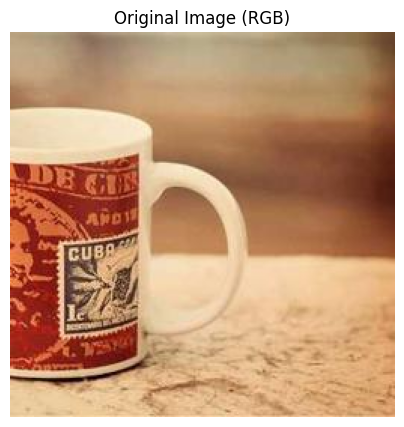

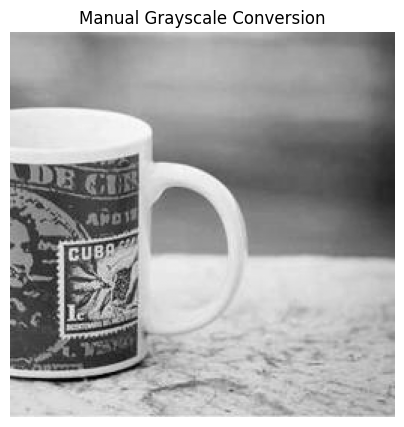

ARRAY SHAPES
RGB Image Shape: (256, 256, 3)
Grayscale Image Shape: (256, 256)
PIXEL VALUES AT (21, 87)
RGB Pixel: [188 161 131]
Manual Gray Value: 165
OpenCV Gray Value: 166
PIXEL VALUES AT (125, 23)
RGB Pixel: [187  75  35]
Manual Gray Value: 103
OpenCV Gray Value: 104
PIXEL VALUES AT (43, 3)
RGB Pixel: [166 117  84]
Manual Gray Value: 127
OpenCV Gray Value: 128


In [3]:
# Displaying the given image in RGB:
plt.figure(figsize=(5, 5))
plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()

# Converting to Greyscale using weighted formula given in the slides:
# Getting the channels from the image(we know that matrix is H x W x 3 for the image)
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

# Applying the weighted formula as given in the slides
gray = 0.299 * R + 0.587 * G + 0.114 * B

# Converting to uint8 again to display
gray = gray.astype(np.uint8)

# Using cv2 for grayscaling instead of the formula
gray_cv2 = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Displaying the result for the grayscaled image
plt.figure(figsize=(5, 5))
plt.imshow(gray, cmap='gray')
plt.title("Manual Grayscale Conversion")
plt.axis("off")
plt.show()

# Printing the array shapes
print("ARRAY SHAPES")
print(f"RGB Image Shape: {img_rgb.shape}")
print(f"Grayscale Image Shape: {gray.shape}")

# Printing few pixels as said in the assignment
  #1
  # Picking row and column as 21 and 87 respectively
row, col = 21, 87

print(f"PIXEL VALUES AT ({row}, {col})")
print(f"RGB Pixel: {img_rgb[row, col]}")
print(f"Manual Gray Value: {gray[row, col]}")
print(f"OpenCV Gray Value: {gray_cv2[row, col]}")
  #2
  # Picking row and column as 125 and 23 respectively
row, col = 125, 23

print(f"PIXEL VALUES AT ({row}, {col})")
print(f"RGB Pixel: {img_rgb[row, col]}")
print(f"Manual Gray Value: {gray[row, col]}")
print(f"OpenCV Gray Value: {gray_cv2[row, col]}")
  #3
  # Picking row and column as 43 and 3 respectively
row, col = 43, 3

print(f"PIXEL VALUES AT ({row}, {col})")
print(f"RGB Pixel: {img_rgb[row, col]}")
print(f"Manual Gray Value: {gray[row, col]}")
print(f"OpenCV Gray Value: {gray_cv2[row, col]}")

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

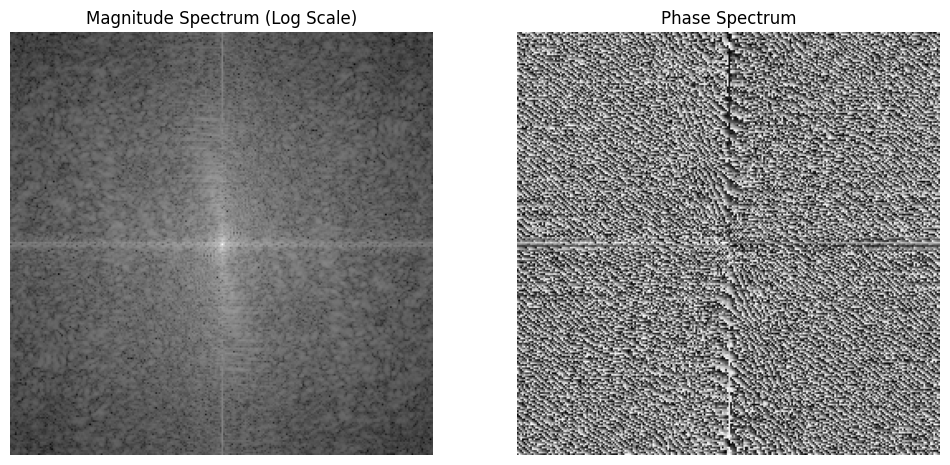

In [4]:
  #B1
# Computing the FFT using numpy
f = np.fft.fft2(gray)

# Performing shift to middle and storing as fshift
fshift = np.fft.fftshift(f)

  #B2
# Computing Magnitude Spectrum:
magnitude = 20 * np.log(np.abs(fshift) + 1)

# Computing Phase Spectrum:
phase = np.angle(fshift)

# Displaying the result
plt.figure(figsize=(12, 6))

# Plotting magnitude spectrum
plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude Spectrum (Log Scale)')
plt.axis('off')

# Plotting phase spectrum( not required but why not, looks cool :) )
plt.subplot(1, 2, 2)
plt.imshow(phase, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')

plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

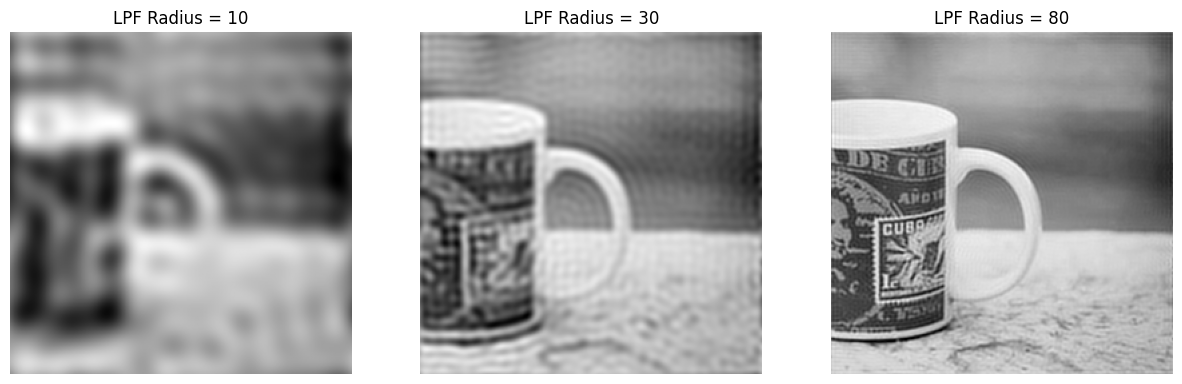

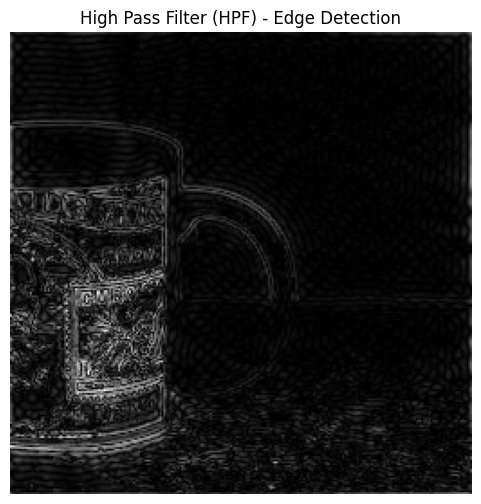

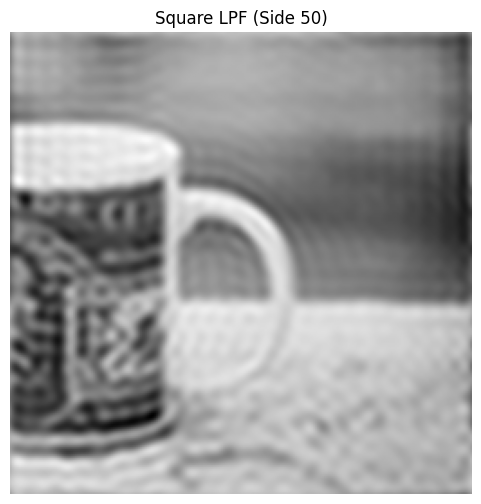

In [6]:
# Function to create the circular mask
def create_circular_mask(h, w, center=None, radius=30, type='LPF'):
    if center is None:
        center = (w // 2, h // 2)

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)

    mask = np.zeros((h, w), dtype=np.uint8)

    # LPF: 1 inside radius, 0 outside
    mask[dist_from_center <= radius] = 1

    # HPF: Inverting the mask (0 inside, 1 outside)
    if type == 'HPF':
        mask = 1 - mask

    return mask

# Getting image dimensions from part A
rows, cols = gray.shape

# C1
# Creating 3 LPF Masks (Radii: 10, 30, 80)
radii = [10, 30, 80]
plt.figure(figsize=(15, 5))

for i, r in enumerate(radii):
    # 1) Creating mask:
    mask_lpf = create_circular_mask(rows, cols, radius=r, type='LPF')

    # 2) Applying to fshift that we got from part B:
    fshift_filtered = fshift * mask_lpf

    # 3) Reconstructing using ifftshift + ifft2:
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # 4) Display the results:
    plt.subplot(1, 3, i+1)
    plt.imshow(img_back, cmap='gray')
    plt.title(f'LPF Radius = {r}')
    plt.axis('off')

plt.show()

# Reason for blur level increasing as radius decreases(as disscussed during the meet):
# As radius decreases we are blocking more high frequence components due to the low frequency
# components being closer to the center due to shift therefore image occurs blurrier

# C2
# 1) Creating HPF Mask (Radii: 30):
mask_hpf = create_circular_mask(rows, cols, radius=30, type='HPF')

# 2) Applying to fshift and reconstructing:
fshift_hpf = fshift * mask_hpf
img_back_hpf = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_hpf)))

# 3) Displaying the results:

plt.figure(figsize=(6, 6))
plt.imshow(img_back_hpf, cmap='gray')
plt.title("High Pass Filter (HPF) - Edge Detection")
plt.axis("off")
plt.show()


# C3
# Creating square LPF Mask(Side: 50)
mask_square = np.zeros((rows, cols), np.uint8)
crow, ccol = rows // 2, cols // 2
side = 50
half_side = side // 2

# Set the center square region to 1
mask_square[crow-half_side:crow+half_side, ccol-half_side:ccol+half_side] = 1

# Applying and reconstructing:
fshift_sq = fshift * mask_square
img_back_sq = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_sq)))

# Displaying the results:
plt.figure(figsize=(6, 6))
plt.imshow(img_back_sq, cmap='gray')
plt.title(f"Square LPF (Side {side})")
plt.axis("off")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

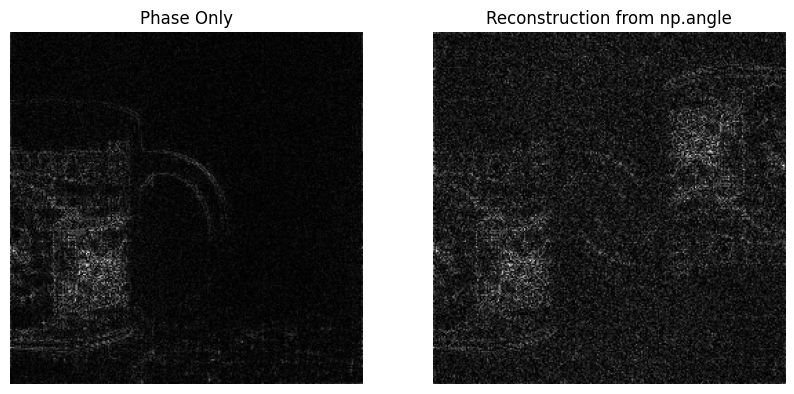

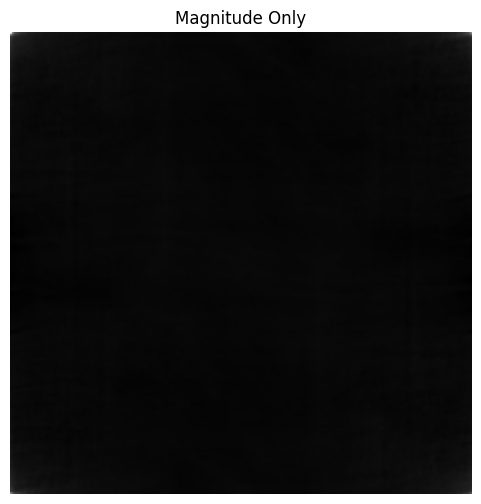

In [7]:
# D1
# Phase only reconstruction
phase_only = fshift/np.abs(fshift)

# Reconstruction
img_phase_only = np.abs(np.fft.ifft2(np.fft.ifftshift(phase_only)))

# Trying to reconstruct directly from np.angle

angle_values = np.angle(fshift)
img_angle = np.abs(np.fft.ifft2(np.fft.ifftshift(angle_values)))

# Displaying the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_phase_only, cmap='gray')
plt.title("Phase Only")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_angle, cmap='gray')
plt.title("Reconstruction from np.angle")
plt.axis('off')

plt.show()

# Reconstructed image we get using just angle is garbage probably because the inverse function
# expects different format of input which is not provided using np.angle


# D2
# Keeping magnitude only
mag_only = np.abs(fshift)

# Reconstructing
img_mag_only = np.abs(np.fft.ifft2(np.fft.ifftshift(mag_only)))

# Displaying the results
plt.figure(figsize=(6, 6))
plt.imshow(img_mag_only, cmap='gray')
plt.title("Magnitude Only")
plt.axis('off')
plt.show()

# Role of logarithm in the magnitude spectrum is only for visualizing as for real
# reconstruction we require the raw magnitude values

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

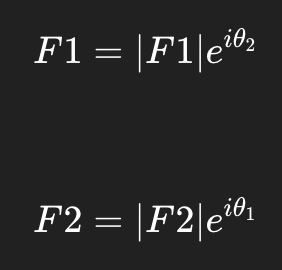

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [8]:
import base64
filename = "cv_assignment2.jpg"
with open(filename, "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAAABAAADoAQAAQAAAAABAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDUyNP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAQABAAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAABAgADBAUGB//EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAAB8TJMpIQEsS6kjVbsYCWBDFqdXBDCQwiuh6X6JzulrChwyq2CysWCq1sFz8ZDnl3BRgwxRGBpoGmzIweIGC1MHBCRSYDu8H6mnXjAUPKSMEUOLlA4s+LlHx0CWQDVupMgNmRkRtOVXhJSwIYYAwHY+o8LvUIZAkgAwQBhQDBPii2SUFSFLIsNdgQSa8OqRUyutBgRysp+ly/ox6EyEkhJIQGAhAIYfEGdEIUgsrQvRAtxokat3K6UvNOm5efOlWZLNoq/6p5r09zJISSEkhJISSAhyJ8cLUjVxhTpBSbGUCGLhS010bbuRjp1MK3LNKeu1n0byb5SSEkhJAEZ+JZ6PkeL5VnqfOcqAVhmtskpYygzyyWl9maUW1NLt6nC7fLvF07/AD9c/ueb

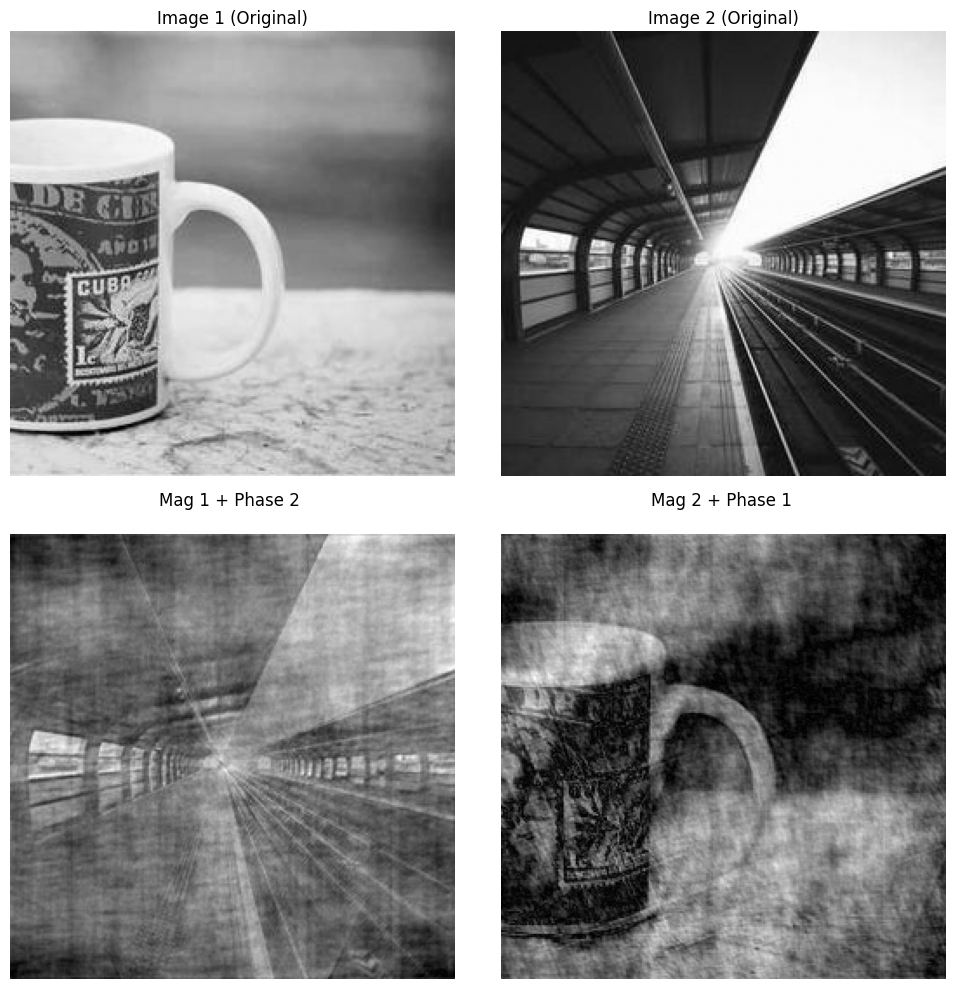

In [9]:
# Load Image 2 from Base64
base64_image_2 = "/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAAABAAADoAQAAQAAAAABAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDUyNP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAQABAAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAABAgADBAUGB//EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAAB8TJMpIQEsS6kjVbsYCWBDFqdXBDCQwiuh6X6JzulrChwyq2CysWCq1sFz8ZDnl3BRgwxRGBpoGmzIweIGC1MHBCRSYDu8H6mnXjAUPKSMEUOLlA4s+LlHx0CWQDVupMgNmRkRtOVXhJSwIYYAwHY+o8LvUIZAkgAwQBhQDBPii2SUFSFLIsNdgQSa8OqRUyutBgRysp+ly/ox6EyEkhJIQGAhAIYfEGdEIUgsrQvRAtxokat3K6UvNOm5efOlWZLNoq/6p5r09zJISSEkhJISSAhyJ8cLUjVxhTpBSbGUCGLhS010bbuRjp1MK3LNKeu1n0byb5SSEkhJAEZ+JZ6PkeL5VnqfOcqAVhmtskpYygzyyWl9maUW1NLt6nC7fLvF07/AD9c/ueb1fV5TJOvOSVFo895k9r5vyVNm/CqjFVGZID0vmvXHpOfr0nnPM/TPn5xt3o+ufPTd1ZeIvVw42m/H0vP6O73OZ6Pz21hV9Hx24+H5jl17/maKekQO2sUwois0sqG/FZJshj7PF9BXaxMNZt852POx6Hp8srh2c2Z31Ka2xsb12ef0eos5fRzzvoz8w3+csxdLkTU3bm9uOnfLoV85tZ14Ohwj13Gu51nWflbdTzHf4HXxvsTM/XnTxPS+fzepq5j43n05tON2aatGelmzJsx0692XZwvK5B57V+Q1d+WYtVvnqu5Q1jrpyDXRy3aLlcm+ambTlz2Y+5xdmNejycaazqxWPnQua6alyWTVltVk1dv5+7l16nS5dnK+Y53U5fXGSGneNOSPrDZ3rsU30ErhRWYGq/lSx7I6l44bFZbGV1Z0slsdRNaNmPXx7boK8Wvyvt/AduBl2XUUxdYaymFOu7CltNeozTVnCawa2DUzoVd0ZbCjFltLS2yt870bub0Oe9i1jGuj4X1/C7ccOezPrASFBEawX01j1Xko05YaaJpGatrXeqF5pYsuysusZhLbZlfN2dPk7cdNQpXG9oydjtw+d9LndDXPLW4lNNhoKlllbFI05ToMrtWbGrNtsrJY9Ri01lbKhXFr0tNbr8ts1a1Qzq3v+a7HXl5ROjw2daasQGlaPVeqxa7krDIWmpy8qVLAhgYIAUGuRa1brseh1tfO2NXdLjauvO/yftvFybsB23OEMZrR0OL0LKMnU54UW1K2iS//8QAKRAAAgIBAgYCAwEBAQEAAAAAAQIAAxEEEgUQEyAhMRQwIjJBIyQzQv/aAAgBAQABBQLtHJGwbU2viYmOZ7zOC6bq6nux3YmJjkIfzp7W7/Z0Gm+LpPpx9FTbWddj9jd/B9N19X9nruEs/KvsbuPvhum+No/t9d1JExg829fzs4Vpvk6z7/XaJcM9jeh65mcK0vx9J9nqDzz9dtY3pByb0PXPh+m+TrPuxAefrsU4l4xYJkRvQ9ZmZmcH03Q0v2eRM93qZmYreSN9GZnntMCGaLTfI1QGPuInrsz2DMrfabadlq0LHrVVUfjjlwfT9Oj7LtRVQM8ieeJtmJtE/XkY3+ump8i4YC425Eop+ReqhV+q3iNKHUcStMbUqDDyAzAk2z1PE9TM3Ym6I4sLB0cU2sE0zsBpZwnT7E+i2+ukX8T2i/X9SPqLWEzDyA84GNkyRMjl5m0wLAqxSqG0+Dq8rWbMV0W2MihE7rNbUk1HFiY+tckvk5mJ/cchAq46Uw4hfEY5iVlp+IBOJ5MxAFmlK2CouJWj40tO3taxUl/Fa65fxG22PZY83TIhxNk2mepuE/Y8G0q36h+FaJ4/AqY3BNQJqK7aYoyfEdzEQYLFzjyJXnOzcaq4BgcrdVVVNRxeW6qyyFszGYQQSZlZ5hLc9sE4Vq6tLSeJ6dovEdMQddpgvELBZdwddtWorrsRK0fUa/TChemdPpdpU4iMcaVSRWPEdio1OotljQ4PL8jAVIGGP6sVBFSl2NFkdGrPx7cfHs5U7zp11VYU3rvSxJrFC6vSqppNA2cPUm7ie3qa3a1l+OocTTqhYOmEaEmdXzrCjUFUgQCPSOnVWleq0/TTWUFU4lxQKx+OM6Esuq6trWcQBIpNp02LJmaTUV10/LE+RYY9+oxczm3Ru/x7hkaEgX6vGdUf9L1Lag/6GsYlPsmPbiPbuLakxrqicVsz129M2/8ASuqZLa36mq1n7bGtCf8AoHONW+RRayr1LDBNJ/5z1HtSW+X0YJpsqWaRunqtQevGw0yzxRFlX4y5ttNreWsDCxyAytj8TAbEnzbRPk0tNtDw6Vp/qkAKsNQ4l7m2VumP8jy05s29OwwUVwjA1H76e7pVWWWtEG0+WIEEEr8lSZtLqH36dy+RZthTB6iuXrZJumFMwRA7LF1tgg1SNP8AnafGJjVMsI5aOZj6mtY+pd4RmJlQFgWYgg5VggJ+iECahenxJ38kmtiNsPTuhNlNg2WKyFZkiZE2gzEyRA2IuqtEGpBh912GsEvZMKJ5MCwDszAYvsHx/wDBJE4ypFlhBcQE1M6BYLMx6mrCWMk/zsjIVM3TwZiY5YzB4nuAQdw5LF9/xj44kvU4fUd+lZgQWDKj7C6bQlmyNUGHqVP+OA8IxMTMzzHaBzAHLxAZV5YkYYiYF2iqfoah1NVn6kiJZslibJWcNYEaEFTBbmbM8sfUBzEBxKYxjTTN41ydPVOeppjBGiPsjpsmTA4YOhUzJnVDQ1+PsHKseDhSQJp/D8VrxZpPzb+GZhiPtjps5JZtjoMcgSDkWd47MwNFPlTgHyWb8aXxbxNN2nBKtqsdaDwYYj4DpsMVipwtsPgxeeJiYmJiYmIZmZlfmDE3YjY2jAOoUPQ0Q9XRQ+geaPiOmw8t4cMhX68+eSegZmfzPhDmvUps1Gms6N9lfRuhnuETERsBk2Hkr4hWZmZkTMyJmZmYT2L63CD1ugbxpmJq4iuLjLj1dOOXo4hU8lbwy7Ty8r9GOfuf3kIIJpTOILupml/PlnlS+Dh3l6APFbwy7TM9+YTP7yWDnmZlLEW3jfUYrFH1Sjq8vUrdZgIjDHJW8Fdpn//EACERAAICAQQDAQEAAAAAAAAAAAABAhEwAxAhURIgMRNQ/9oACAEDAQE/AcdFFFFZq/kISs8Ss0eBqyXGVESjVfOO9kaZqSpH0/Lsar2e0fozoQuBxFAqkMrZCez2j9GihCZLsvjgbv1o8RniJbIREkrE64JdovHW8y8iEMkLHZYmSHmTJMvPLD//xAAiEQACAgEEAgMBAAAAAAAAAAAAAQIREBIgMDEDIRMyQVD/2gAIAQIBAT8B5rL/AK9l879lid7axq3MkOaR4ur4aeKz5WeODnM+qPmvoT20I9kuhYZL2ajWL2LLJIpke8T+omsUPEY0xLNllmoiaxu9kz9Kv2LdfAuyPKxkexD5WQ7Fzw7y+WGGfmEPP//EADYQAAEDAQUFBgQGAwEAAAAAAAEAAhEhAxASIjEyQVFhcSAwQIGRsUJScqEEEyNiwdEzQ4KS/9oACAEBAAY/Au3KpoajvvzXbNn7+C5s9u+Yz4tXdfBct6LeHeYyMlnXwjX7xQ940EZ3ZneEwnR1FB1HdCRkbmPhm2nza9e6BO2+p8M6z46de5AOwKnw9FiGj69umqxkZrSvl4GvbI3tzD+e22z3au6KniB7Ij4dR0udRC82zhmtPbvZtbRreqr3coP3t9rj0QuZZN3mqDRoO7wsm1dwYodaNsBwbVyljJd89pU9qir2q4c2oCLOC2SpkAKpRto2qDp3M2jw1ZGBo+a0/pZnOteRyt9FGLC3g2nboVUXUv1VVLdVZ/iB0KwhiytKDTTEg1ug7dM3TT1WV3lZ/wBrLk56n1Umpu1u0v3KkhcVURdKiIVLqlap1hudpPFQGgeS2li14dnMVDdV/azy7sUW5bS3olOL2hzWt0K/wgfSYX6dtaN+6yWzHdRCh7YVdFkeoKl2u5QuNwTXxte/ZzOUWQ9VV5W5bJCjEqmfJbKpAVTfpc/Hq53BAi0iOKrbNlH9ZnqmgGQArR+GcRhDHYN9EaZJ0CGF5INIKzifzRNDoi0t01uhbNL6NlRsqpVMR5KgCPJbNVJlQbsIBJ5Ij8t8/SswI6qcDoWx97obxWHBCMUHRRM4v2pwCDcALtZhZrOKKlTCbDutZTGtfO6FbyfkR6n3QoqOC0vNQVUUmEP+FbEaMfRMDg2rN4X4huQCaSFbQ5mEqwMg1iiNPVAt1TjhgmpqmOcK6JgjECFP5V2F1i95ncsv4L1cqfhbAdVH6LPpYpc6SgBaPaP2lVc89XKumFCBHkmO3L8S0CTTRS+MU/CqUU3UKyziG7eoyu5FZmOaeIQLbYT+5PEAhz8RITbRzDAbEAq0IY3M6cye84Wz6KyqD0U2h3brv9n3Tczj1Qi1cPNf5SfIXHrdVaz0WkKjorwVZd1KrpVUEDi5CZdA8lW8LH8pk9FhEcufJDFs8d7SotRibueFiYcTVwKljlnh3ULNZx9JWW0j6gpGYclq4KQqgIUVfZfDcQwDzWa1/wDK0nqqXHLMlZjh5KQKqT2nNjaag07TTh89yL6cHDipkusjSDu5FY7EzxbvWcQeIUjQbwswVLpW1PWqz2Q/5VH4fqWVwcqi912s9FlEKqpTuCUFbWW61067ljih1WINynUcUHtJwcd7StcFp9ijWCiTkI4aKo8x2v6W36rPZNP0oqRvUuK494KKztRqsY2bQYh/Kwei0lp1HFBza2Z05clhdVqkGWneuXA6LLkdwOihwjwgWpQzIO4J7N9mcY6b1I1VVpLTq3ig5pmzOhXFp1BWKzqN43i4tNRwKya/KqiPBG4J7OoTXGo+LpvT7KdkqdxuIIlp1ag5pxMOhU4i3ouHOKG+H5h91NmZ5b1XwIQTh5p7easrXe39N38XYeFxBEsOoUgyw6G7C8+ar63/AKgn9w1WJhxDkq369rVa3fdfZam4VKidya7iE+wP+0U+rddO8XlrhLDqECDLToboNW8FiYZb7XyDBWYQeI70DsN6qflKDhqNELVuzajGP5u5XlrqsOoWsg6G6ikUcoPc6rVa9xPNOHEXPZ8VkcY6b+1hdVhXEbjfD/Vfz4MFPHNNcdnR3ROsz8Pawu2T9ly3G+DUKW6eBFN1zTG0LrK237Duzpdhds+3YnuZX9L+u0E8KflN1pYH4xTr2IxQhphO8I4fO7C7Z9u84dzROHEXBw1BlY27NoMQ7GpaeITiazvXK7C7T2v/AP/EACcQAQACAgEDAwUBAQEAAAAAAAEAESExQRBRYXGBkSChscHw0TDh/9oACAEBAAE/IfrMY2MsafiHq1lHTeGvq1qWpcnqtf7K6VKlSuipXWpbop02ht7l+7f3/P1bQ19WTAlimfzPpqV0qV0JUM/T5hguVgdzmKxyw9zjoddiGj6XBKS1k+Xg/u0rpUr6K+lLYg39KphrP56/yEOvCGvpyBMen/iHt9NfRUrrUbVwyfShddZ7dn5inKkph9EfQ4lpu917Hz/0Gt/RXsg2fQ6ZVHw9D/yEInS0fRqHeVJr4bj/AJ1EuZ9MRp1y74hnrTeIvMG/S1/kOisQzo6hKqZfZIYP+zzJZvfSpl+OvmIhWskOixV8PP3iJg3GLiw6KyuoUtD/AMj/ALAHol+sFGLJiXfx1NT3lB/oeHx+Oi8VZmDcM7KIP5kAQwDR/wBh9JbtmXcWXTjXRa9RawWXpMmf2IBLll8tRharKQ06A/YSqFZvAMeP+qjh8svtPFLHX0A3RLwN04lXEMs6hMSm/EOApfu/9/Mrvh30tvHksWWu8bzCdiAjRUH/ACUC1A7xMgeK69XUs/4nmIV94gtyhrpYq4BxceeEtwHvKW5emziVYaeIlS+JedCuGanK9VjmWYq7pA/uCUP44OCf8CueDCty+09wF18bMu/ax9m5Ug7VSWnThp6Ei2oPShJY4/DP2cihiotMWnp2+XaGc2oGKg7g0pTjOO0wa5+8qhGK1NxBUGCgo+paLhLa57XrpLQpP4z/AFEqBO/2WZYIpy5YfxmRcYhD/uNm9sFxtcpTah34fiJsQKwQTDH5jlPSSCuztPHL3ol7KYlTB6UZ1+nCVmuKlq64Vb7/AElYSNqD8n4P2wxqq4vf21+Y7ao86nxl28wJwVNMlfSV7p6sxt8CPmesfVXE0VzFiuJyhe5CPuNRme3jQojyQRsZzim2oH6tzdBhbVcCSqM+SU0yntlSC4gQdFt/KYyYA6k4b7ESmj5UbcftxExpekvSorQJ4WBVJ6Izd3ll8XoE5AwR5+0q+7GGkFLZF20Eqoa4P+T4xTFIs4IH3YWd2cFZ7DP7ggLi0XMjApszR6y93QCdu87UwYVcWVBIGt3NQXJVcSvxq7lpt5VKLdL40Lu1HjUZbt9lnEL7IuSneuZiQ1yNQutgVuCsJvSynQXqbBmeCEBWC0Di0Hlv2VCjli7neXvIajRhy5hmypkSGsnHd4pobuDUEKijUZTWyNWZG6SWEUPc5HtaelGzCUrXUQsbUL3OZa2yp5P52glmfqAZQNFxWqoeYAuCAOry9pa7hKyXuYVjRt6ywc2sPfcINggruzYQ+3N9pZTUI/HKLOS+H0gNc3eEp2KL4USiArdsAu0ssZhECzy7TByuCyo0YPe4Rn4pt0Q5Cb98FY+qj3fmK8b3UoBDqkj6p7jGtbsxKkrW9ka3VkT5IkayvZUNx2WVen+Q/wBSG9mI1X4lPF5Fjpg2Xr4cw/2LTLR3kXLooqgVrUZSy/FY4mCgUpcsa5uXjt6r7IsBlXcZeiWHGdkX0gNh6P8AqOZo3uv5hVhNUjt+oT9TYixdKmSD1mmXdhcWW3qj63mrKUrbSAVUD8YrNxeq52eBTjT5mw95nhmHGYKCW5bq/IjZFs5mPJ4dyzDRo+OXn9+sNCfzoDQ960eTpSFj2hgD3KHP3f8A0j9kKvvHlJ3Hc2h66WCz5gGVFHhWNwoK+8Xr/SHE5iuVQ348CoLK33dwqQHpDi+JvR4aZqYvHcqzU5cwLAr3ZV69DntSXMDUGHBC4+K2q7Bt8fiYRbu67hlTkNlv/FMQH0yGh/kti9dX5JaJbUtZf6l9WeZQyqM7tFHuY/Ewah2JGzPlV9md8bwKiWyvDN8ynZ8xKYvxZgTC5e0WQB+WIrVswm6WtsKEDoMGJ5hzO6QTzlA4yff+6z3mEWBWf3iGxgfIO0yeNx8A+fzBgRwL9x4ZlBy+YhblIy9uJn6B1oek72JwIsmhmKrMPfCYUSdjc+XBV0y+mxWZkynnUP4QmGtHY6gELhDLoKxPnTTCW3Su8QtKYfJCWCndnh7Nzms0e4irA9PoQhTiJ2u7z+ZVNZQ1aTtEEcy0BLbK17QNjzGXvLmXKSD5zL8ETLTUbLmrmZeW+gIEIW8wxzBdXA95k5hd2M01rv8A3zLzzZ0sHY13gB9r+p/qGeP1YNSjkxLnhf2YrmGptD9esui3bZ4fMe5jwkxG6GyDaj6XMcXpBlqva+O8sIy9Io1qCIF3MPMCCAQIEx2lkAlek8CATaoBmj+/iUsODEqA7wwsampckDE0tHu8D4itvoe5w/FRfbTL5d0Hbn/3zP4A/D2YJ4jkRO6WtHzniKqfeXKwfr6e8ScPzTCO6EezU1KgQJXQITHQA7TFTvncXX6/9lwzmVUiEw/qiey+yUkYyPSKHn7fl/GPaAbOJ3t/hBzL3y1/Tsxq717/AK+ZcYcdoJ9FzIKoU6GmagCI0nMA1c9h/sygd39iX2SoHmVHvD1h6y2A94XFsWuLiP58TQl9v2YKcPoxA247xouY5mYFbv6Rby97/e0zNim/Zn9j3gqh2RtghkWG4Gf2CmTzFfAX5/8AfEwxylftT2VHPVe13CF6gTpXCH0BJcWZsyW+suZxmUNspdCNoGVzJUndnt/VFxpL9UwDj+BdPm45ixO0TiBIZP3AeSIKbIeSblvf/sdF5jhgahHoquVKHcpK9GRKcL5nrfMx5fMwNvzDDdXiZe/4mdgGalUyxYNRBoYDKN5cJg6nMHungfhhVQXFxTsm4kAI8g5HuRAyLkNJNzI7hy1wYjnTrumToQ6G5uesxFqNsPQg4s9O0ure3tDXlFhZWLOz0GehxUPgRV6bh5S8XdYYizar79mENNkGlyyNIKGrXja7kbYKLDTPWOIg2GxmDZ2dugk70pMVXKnJK+JTVkHQ+8HbxB+3aDdV64iCKOZZtNap+IhkZpDZTY1HsX+E8p2AHvmn4iuLB9Jl+DE2LdDNt/d3I/eHInJ0qBV0V0qEqVHwi1yriYv8sFDuvuhTwfzBhFqKM9sx+XEqTv8AJG9zDpX+nkmnz0LcWxR51GhORC7BjTt0PlL+MSh1w94QYYh0Ot9GGiDVtiaM/Mu87D2ivm4pcHpMD1nl7Z3mHcrNqnAOkOf6EyiUTayUrwfg95gDzDmWrNtdA5HFhqH56f/aAAwDAQACAAMAAAAQAMYOuZMo8QAAnZwNoBU0MxU44mbnwmhMJ5kkLmBMUuIwO/8ARsMQAAI47wGogAEBIgKZTJo7vzOAAAAAJ/oXYBmhiLAAABmBXRAIALpCvngAApRnDDUSFCWY4q/6PCwnZ0MhyzLcLn5XL+ykpJAM64UaeXqpxdNyR7WzaVpjUVYihEFOm1B/VJx9rgxQUG/07nZZELYI7Pgr5xq0/iDAaHP0vPdX9NAJEpGLwo2mXbwuFeOjvjhmDCiCGXarSC4MUv/EAB4RAQEBAAIDAQEBAAAAAAAAAAEAERAhIDAxQVFh/9oACAEDAQE/EOMs9D2ngRI8c88smJJweOehk4OSTO+H1FvPYST4lDj6O8FnJkvtJFuQxr4ravyzfvjmQgphDzW1wfnhj4DhaX7kgjqWxG64YFZHXVH0LB/ZM4HbS+LeuAA37DFER19tzshZbxdMmPUsJllNvnhERYHT/J20DI63HiyvCQD5IXYaX+oT4QcnzY8kW4ZDF2znOM4IjtkYGE/Lo7KyThieTghye9y7lhdyXWMv5yT4jEFxLo4v2fRvBD1AWBOph69YxPotn7bnXG8PH//EACARAQEBAAMBAQACAwAAAAAAAAEAERAhMSBBMFFhcYH/2gAIAQIBAT8Q+H3720hiHy9Pry222G35J+XnYbflh3rg/lZ6dkEBt+8flm/OAHbbMPkVgX+E2WTwp53OYR/6cmW225xmvB3kKTZ6lDqMadSn+i7MEz7a/wBQt+yZCvUAg+oOdwdMwYN6P9ZHbpu7WEOR5DuwNjDqc3+oLDHdr2H7Y/Y4Qa9zYNnEMQ7SkxhhLHZ09Enp4eN7hGmro4cgzk38h2fK4bO7rd5+yDuOMyX6eHeL1hjD9OC3Jz0498+HhLzDtCPOC96nq9vONttnhIaoLyGMcCZjYlt58Pdk3tiE96iRDvY76ZMv/8QAKBABAAICAQQCAwACAwEAAAAAAQARITFBUWFxgZGhELHB0eEgMPDx/9oACAEBAAE/EP8Aika4YRHaAnpuHWgz9Z6bPUFe4ZZWFmp0glVAyMIwlQPwq7kvxTDZ2X1n4ToiZ/BhyjCq1HCOH4Mss8MEg6ywCArXEVCWwzUnLRT1R9pVP8hDpKlTATTKlfjcCAlFWgNv/mBQAW9aLPRR6lfiokco7RjaMg8yzHTvzK/FRLI4r5QTcrqDA+FinXYewXsphuDMDMrLDA/BKlSoGZVXlwQ6aBaYt/db4inSJ0j+Bx+EjhESIwlXxEs4QjZ7Iahv8JWzD9RvBKdXQ3U2/i/QnD8AiZ1DhQY+IErtK7QM6h6KbnbKBpT6FHm/w/hLPwSmVjUqNowF/jLDqCkyRlg/glWTIj03EWq3ur9FH1L9QB0Rr93+BqJBg95q8QMypUwJdBF5mIYo/YD4gYlSvw1UqJmViVEmI6rWGdSomIp2eUAE5lQ1E+9zETYCnjotfNH0zOCaIfvB8ECmBAzNDm2Zm9BeZKY/Gff/AAqVElSsSokpBNMyYzAlwxLM6iUWeUQL/JibGY46371PefaLPJbeYLIqMx7z6EAplFTuRX1tZrpe2j3AAAAGAKD/AJu/xREldp4lDuMZUektVh0fhKV1h3T+oNlmSBBRBszGACxu3SCqVBNJdfX7ErZSOgIJDn/cykqGahRslg5FqoFLAamTh/vs/wCqvzXdJ2CWQjb4MBGnWDaYqscjLYG3x0hhdzHmYFuaf2V8tautED7QczXWWag1Kf5gKzPonNQ6uWMj3Ceq1Loy/wAPcOoFQaDp/wBaX+KqIyZRXgiVG4YJx+IL4juM4qZJSKBvBBULqI3/AJCaAYMu8nw15GCes80Sk8QU3dbgXUWnSIIcBK6gZj1puTI6+X+f9rLiA+A2fiXEFHrKlq4RjmLlar8cmVCm1DtDhVOqmFt5YNYXz0g6Q0og52vhPEQFoCdzPoyOylWIwVmDdJkvopKFwFy7g3h44lgiEkWDlX9QjBBuAKP+lQj0AMpwTHeppV00oshO/wDbgPoj1BlS3g0fMIU5O8s2ae0ctygQL6wEQRksv9QRaPoxDWRxL5FPbklLIJ3j4m+K5qLZuwkLYTlVSCx1RXyEdg5/Jw046lPuLKoLgFBnfaGBAu3Oqu69QFygF9zxF9Ys5WDl9v6hr/oDRjp8AMvojo1HFK9x+ypZ4nSKO2T2iPiI49sZfcVffmWDUs8r2mXe4aEO8DPiGXFZeQiamDzkVXQ8MHNp5OJZZc/EEMlX1YZbIHNMyjoekee8eAYnJp1BhmQNjS/GPiLWYmVqoKiRgXJhTKqRfdvd9EBYOZwH/K6SAbVoJa/ftQeQafPqJKcW57I18Jq+kKnm34VC3ITqe2WWlHdQFgV2ahWhk7E0tu+EIUK+omw4rGYQVvLebiLbOzibB3QtAk75slkI7hUr4PStekt3Os4T7isR3HUphEDzq4LQw97ga84ViVmc8sDkfmYp5sobLHL3jgTXACv1LJ8WjVXtAqX+LCMns65+DMC78U4v0eiXIzWsXwaHv2ZwnwVJ4Gj1FjSX1rMFZvYyjD7zO/TRh8x3EAP1rMD+1VfxGulCU6HBGbGWwOlngWY55t9JdfUsFPpRPoYChryY/Fkw4iug3TDNQTGms9oUayuknxMxg8nHqM17rU8t4Y5pR4AgYLVW8BBTQDwXUVlisprMrnGMWgx8t+4KBjuYhFqCj8WHSJ9XutmEFrAfjcp6JzWvib93PtBAxdhm1cPtqM1V8h+C4P1SZ9s0i/dfojXRXZIT9zc4h6gPApdpnliAhDnJEEKAZB5X5jqVG6bZGI1dQPuOHAUDa1jG4y76W8mYoF1+JYFjPcccQX22t45sMQfRzAJqobZ75iAoBybNCsGOIc4k462FZk0m5Wxe+PpKihYU+L0HXEc06aVClYcVUM8M6nMboQvETThE/wB5lmaeS4+WAKQ2goJ2q15s9yglNrYfa0fEG7bhFPiUuIs5Kc3YXFIErxa+blUNBeWPmYhTPKr+pc4jCV6Bh5ZMdN6NkWGmwtRKKALFV8yhAC1VR/ZVaMBtWK3JiopmHRI4OniOO+06davvcKMqksu1uTHSEqOowDEX7Wwo6TG4BB1h3YlOipUGQekFI2HTNC9tcwTYPIIQx8HxGJp8ybrNdS/UJYtjCmBfxG8pFtqrZfiJxBh2ODUHFEcKqWwlJwxSQdFce0uKoqg5equLstoL5zAvVH1AGUeiO4L7lRdRbo1QVc2QnHukDhvi5tM0Hi6HEOTcLARpwvESnVHdYcXMSLoqdjIEce4oKYe0PQnQ2gYdeItlORywdr3gY6LAMZzljb2EG8tcczAHqO0NhKGseYgt3er9E0o8WcR2zkgeEy2egXSyukao8NyvnGfuO0cKP9/+St6tUWJZiv8AUCU3OPt0v4lESjCt5f0we0UaYMPTC7jLNTC00FcHhcBABrOy+3LDvWNS8KwlQlWx2c/T+4AXNFIW6zxdNPMxJdApedfIl1mmH9HlFQsoA318vPMHnFra8W8fcfpU28itHAyi1V02yttvWEqmXbwW8Y4liITwuNuI9mrkMb5yxzJEOSYp7S6RLAmD9TKw9P4osUjg2jwlU5ABA+SW6uwX2IlZqn+iA119Q6mm7BKj32v0jo7wYxZUmioSnsupc0Zyv0YjVCCnAW/kuGvaTwNyi8X1ooDgyuua3FDZFgYL5aMe5SFKGhS4EuTGLfMJopbqsH4WXVLdhgt6gYfJqbasjp2cY7Fx2WhtAHd8Uvjh6e43owzTZk5D7O8UEpu4d+OIYwXVSSvAnBffCfMMo02k+sIII35H9CVjzIEHwyq0XCW1M3FxaXBAN2UhJdNrDzKWyGYHMbh5p2lwAqrFY6EuUJ2H7MV7hpfeJVi9BX6gneP3MYVA0F1AQycBn5NkAWXUds+cfuKV/aQ3df5TXJAU3UFa9WXKqm6wRlQhpykpatsdrg62PLlF0aM0bFycjhONQmPJY9A5TeCzJTZFeSGEA5Q2rOeOZdvU0HK10XZkp8ygJRgI68+0aMD3f2OeuxxUSsUOpiCerQr5pCqK4J81cBpR3Zf+O8rsHJF+ck5piIJ9Mtq3c/3OVDzSWJ0a+5UHrV9yqKgG1wEtRX7p86nU2CH2cS1p9q3EhclqGf8A3ibgty3lgOsxUSncCtW0y2I3BN7Ziohsio944KlDjrEDUMvRq/8AAikgoXux6P0wrQbvu6uOR2bIRo7m1Wyx0adDPUlPQDf064KOdPaW2K1f6I7OzZDwHGwtaz/BrtExm7rPqMD0ljyaZfpbqRyH71OQvySlRB0vEBeWL/Uq+h2L73NznNz8QV5oALBbhmOUPyqPghNbdmCgQDoKIQ8wzVyrNsSSlqOuWIjc8k6GpvLDLJZQ4zdX/fiWgA0GaIJkARQRQMyII3DlKOaSzxCA6VEKnYy9HqLZQFb909EcjscnSIWPyUR6PjY5q89Cp/DdpBwA5eM/2dNy1ZqDydPe+8G2mM5+y14fmKvGOE/x4uOWWnUhMCneE5WQHuRBa+49RT2mQbdxuAEcJcW43QOiZbWUuGN1+4ENlQpoHkl9P1iml31BBlLLFviEqgcuODefB9wKAF2jDZj9sLOJuoig2Y6Vor7i13fG5pLfcbNFCG1QD0nzxBibV4fMGNkpKbLiOo2W9h5HHB7LAfTQGQ2Zo/CZIFyIj2dnuTPQL7Scncg0LPpiQh1zRhy2QQJjKyvyxDCzw2inuTIK+og9aggD3E1CBBvLOoIUAbxc7BcEWpcFjBKDRtDVs9YsrHzHDhyp2N/UOtdydzL909MsVNOfKc/NwDIvLq1H0JteNIX/ACAZ2BrNn7I/ZTpK/IL6IvazdrePlL3BwLGm9PDHFWL+5ZjTcQJqngbOrtKaq20ps2HBydrMQHuRRFOo3264isDFjQ5KG3Y5hFcacsnhhQrdMUXMoVXj/hls/I08ob9QUqaYa48wt5dUzwgIEKUahRgMwziE/wDsXsuFVtN9oLhHoBFntynUvHyytbk242WX5oeoEpUt33YNLO3BDpGb46qYAvIDjf8ApFKKsKrLNfDLiu7WxY8tiOq2OYkvJqev+kVw9hEQzBbXYrg4fnEVJKgKryDgOz+VKUWtbWFaf3MZAao+TqQs5HrHtEVqmM20A0nuAOLGDyf5RwMMu8/RKP2JxAPWUNWguqAurQPVLRgq7j28CA8vggP+hDILODHz9QAuaOXbT+wC5NOGDoE6UEItlsqUkO85a/sLghrK2qqjfboAq0a/TCaMtywZf2kBRo2R2cfu/iCJrJfUmNi8OkcY8w7sgz0iafgGuumASygUHucDnh4zMNgXzcDvi/xdGBF12vgev4MNwkAaSo2LgVUPk1fiCWZIAesUVQTxBO0peZgStQMVdzOqwevTmLQC1uPAaKgtKQo5tzBJ8ES20gGWBGhSND0SNFa+1CqScF22w/ZCmh21QbPuULAjNYHo+6Ynm+8syr6Hhl9q6dxWqezHQvKMJw3Cfenseo+kP5PUlhvSTAI8nAglvLceHvFgDsSbnuAPuHOGoH1BusoefmFGAI0nSDFWOYGE1tn9owsluLkktNB1R+pcg4GHTDtqBQhWy5UoPaoAwCkxULGe2iES7XeIKQKPdLPupmDyrxGWBAOuEdhPYy55MTni4vbu+pEonMzZ4j9EWHtXD+5VQH5ZH9OIJglMsyZGmABoFbh56wpi6jUNuoa/BFZlzISzSAha8oQVrN81Aty8TdgVp0/eKf5AF4F5N83roeYDUAUd3L0hX5E89t6xGYSg5lkcrCsZumviZLe/3P8AUtxuksXkhrES8mH0kC3J6J/1v1HyNpDgbDsiRb3KvEkER7lESNyxMMBj/wAB05hQeCCep/iDZW2oFdo6DSBYwFq8jy/5QPR+IHR+Ijh9zMF0PMMAfmAs/JB6Vp5g4rFAFG3FtEpEs0DZ33mUI1gWuRb56x6Etttg8j9wxmsZgTZ9MNAOckvawmy0oG9NOxEda0pA7RTfVVfqoFaCcZ47xw8+t+byj4lIz7l2HMufYf2Clo9VMr07uGL0dPwx4Cm8ZfsO5zCgoDbHWGZZwyBKkulwDuAJAVNNQwzMHmF6h2wDZxHeA0o4ZdGLDoh6OYAIDEwwOe039whm/wDTWIWqzGHOJkwcGGpWi6TUACtkgmiAe7P+yUksKeBT+pZk4uMUVaHj95klrCUMJ0i6nIIdBfsWvUsSksuGuvTxETQU8v8AEplgKjCbXR/iFkFFjocJEFiRsPHA5rxAS8YgzmDBzMMVDLMbQt6sIAuRgu3X+5QGAug3jxFNQYl/tUwEYu6qqZgDN9Y1HpTmZAFa5nDoEJzOM5ttGBBh78ThMgdHZ9kxfRxHWoi9EzBHKlOrdPTBy6nSI2OwihaMtx7NQvzq0bOgiADtv+Nnp7HXx2mKVOQaTrBn/9k="

img_data_2 = base64.b64decode(base64_image_2)
img_2 = Image.open(io.BytesIO(img_data_2))
img_rgb_2 = np.array(img_2)

# Converting image to grayscale just using cv2(easier):
if len(img_rgb_2.shape) == 3:
    gray_2 = cv2.cvtColor(img_rgb_2, cv2.COLOR_RGB2GRAY)
else:
    gray_2 = img_rgb_2

# Computing FFT for both the images
f1 = np.fft.fft2(gray)
fshift1 = np.fft.fftshift(f1)

f2 = np.fft.fft2(gray_2)
fshift2 = np.fft.fftshift(f2)

# Extracting Magnitude and Phase for both the images
mag1 = np.abs(fshift1)
phase1 = np.angle(fshift1)

mag2 = np.abs(fshift2)
phase2 = np.angle(fshift2)

# Swapping!!
# Applying the fomula given in the question
fshift_new1 = mag1 * np.exp(1j * phase2)
fshift_new2 = mag2 * np.exp(1j * phase1)

# Reconstructing the swapped images
img_combined_1 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_new1)))
img_combined_2 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_new2)))

# Displaying the results:
plt.figure(figsize=(10, 10))

# Original Images:
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Image 1 (Original)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_2, cmap='gray')
plt.title("Image 2 (Original)")
plt.axis('off')

# Swapped Images:
plt.subplot(2, 2, 3)
plt.imshow(img_combined_1, cmap='gray')
plt.title("Mag 1 + Phase 2 \n")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_combined_2, cmap='gray')
plt.title("Mag 2 + Phase 1 \n")
plt.axis('off')

plt.tight_layout()
plt.show()

# We oberve that that the image using the phase of image 2 looks like image 2 and
# the image using phase of image 1 looks like image 1 as phase tells us about structure
# of the image